In [50]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [2]:
sns.set(font_scale=1.5)

In [3]:
# read the cleaned dataset
df = pd.read_csv( "../myInput/Clean_Data.csv" )

In [6]:
df.head()

,index,sub_area,n_bhk,surface,price,company_name,township,club_house,school,hospital,mall,park,pool,gym
0,1,bavdhan,1.0,492.0,3.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,2,bavdhan,2.0,774.0,6.5,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,3,bavdhan,3.0,889.0,7.4,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
3,4,bavdhan,3.0,1018.0,8.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
4,5,mahalunge,2.0,743.0,7.4,godrej properties,godrej hills retreat,yes,yes,yes,yes,yes,yes,yes


#### Preliminary exploration

In [7]:
# check for the new shape and columns
df.shape, df.columns

((166, 14),
 Index(['index', 'sub_area', 'n_bhk', 'surface', 'price', 'company_name',
        'township', 'club_house', 'school', 'hospital', 'mall', 'park', 'pool',
        'gym'],
       dtype='object'))

In [8]:
 # check for the unique values
df["company_name"].unique(), df["township"].unique()

(array(['shapoorji paloonji', 'godrej properties', 'anp corp',
        'urban space creator', 'vtp reality', 'waghvani constructions',
        'sukwani associates', 'mantra properties', 'ravima ventures',
        'proviso group', 'unique properties', 'nirman developers',
        'jhala group', 'shroff developers', 'kundan spaces',
        'venkatesh bhoomi construction', 'lush life',
        'maha anand pinnac associates', 'vasupujya corporation',
        'ace constructions', 'wellwisher apartments', 'dolphin group',
        'oxy buildcorp', 'kohinoor group', 'bhaktamar realities',
        'porwal & anand develkoper', 'porwal  develkoper',
        'keystone landmark', 'puraniks', 'majestique landmarks',
        'kalpataru', 'vijaya laxmi creations',
        'vijaya laxmi infrarealtors', 'calyx spaces', 'supreme',
        'tejraaj group'], dtype=object),
 array(['vanaha', 'godrej hills retreat', 'anp universe', 'urban skyline',
        'vtp cierra', 'vtp blue water', 'om mangalam chaita

In [9]:
# drop the columns
df = df.drop(columns=["index", "company_name", "township"]).drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sub_area    166 non-null    object 
 1   n_bhk       166 non-null    float64
 2   surface     166 non-null    float64
 3   price       166 non-null    float64
 4   club_house  166 non-null    object 
 5   school      166 non-null    object 
 6   hospital    166 non-null    object 
 7   mall        166 non-null    object 
 8   park        166 non-null    object 
 9   pool        166 non-null    object 
 10  gym         166 non-null    object 
dtypes: float64(3), object(8)
memory usage: 15.6+ KB


In [11]:
df.tail(10)

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym
156,bavdhan,2.0,667.0,6.499,yes,no,no,no,yes,no,no
157,bavdhan,2.0,641.0,6.499,yes,no,no,no,yes,no,no
158,bavdhan,2.0,665.0,6.499,yes,no,no,no,yes,no,no
159,talegoan,1.0,280.0,1.319,yes,no,no,no,yes,yes,yes
160,talegoan,2.0,385.0,1.729,yes,no,no,no,yes,no,yes
161,baner,2.0,730.0,8.700,yes,no,no,no,yes,yes,yes
162,baner,3.0,1135.0,12.900,yes,no,no,no,yes,yes,yes
163,baner,2.0,789.0,9.500,no,no,no,no,yes,yes,yes
164,baner,3.0,1107.0,13.500,no,no,no,no,yes,yes,yes
165,baner,2.0,776.0,9.068,yes,no,no,no,yes,yes,yes


## Converting binary columns to dummy variables

In [12]:
# Selecting the binary columns
binary_cols = df.iloc[:, 4:].columns.to_list()
binary_cols


['club_house', 'school', 'hospital', 'mall', 'park', 'pool', 'gym']

In [14]:
# average price for apartments with and without swimming pool
df.groupby("pool")["price"].mean()

pool
no     6.014706
yes    7.394286
Name: price, dtype: float64

In [15]:
# Transforming the yes/no to 1/0
label_encoder = LabelEncoder()
for col in binary_cols:
    df[col]=label_encoder.fit_transform(df[col])
df.head(10)

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym
0,bavdhan,1.0,492.0,3.9,1,1,1,1,1,1,1
1,bavdhan,2.0,774.0,6.5,1,1,1,1,1,1,1
2,bavdhan,3.0,889.0,7.4,1,1,1,1,1,1,1
3,bavdhan,3.0,1018.0,8.9,1,1,1,1,1,1,1
4,mahalunge,2.0,743.0,7.4,1,1,1,1,1,1,1
5,mahalunge,3.0,975.0,9.5,1,1,1,1,1,1,1
6,balewadi,2.0,894.5,7.5,1,0,0,0,1,1,1
7,balewadi,3.0,1174.5,10.0,1,0,0,0,1,1,1
8,ravet,2.0,905.0,6.5,1,0,0,0,1,1,1
9,ravet,3.0,1125.0,8.8,1,0,0,0,1,1,1


## Sub areas contribution

In [40]:
# Contribution of different sub-areas on the dataset 
x = df['sub_area'].value_counts(ascending=False)
sub_areas_contributions = x.to_frame().reset_index()

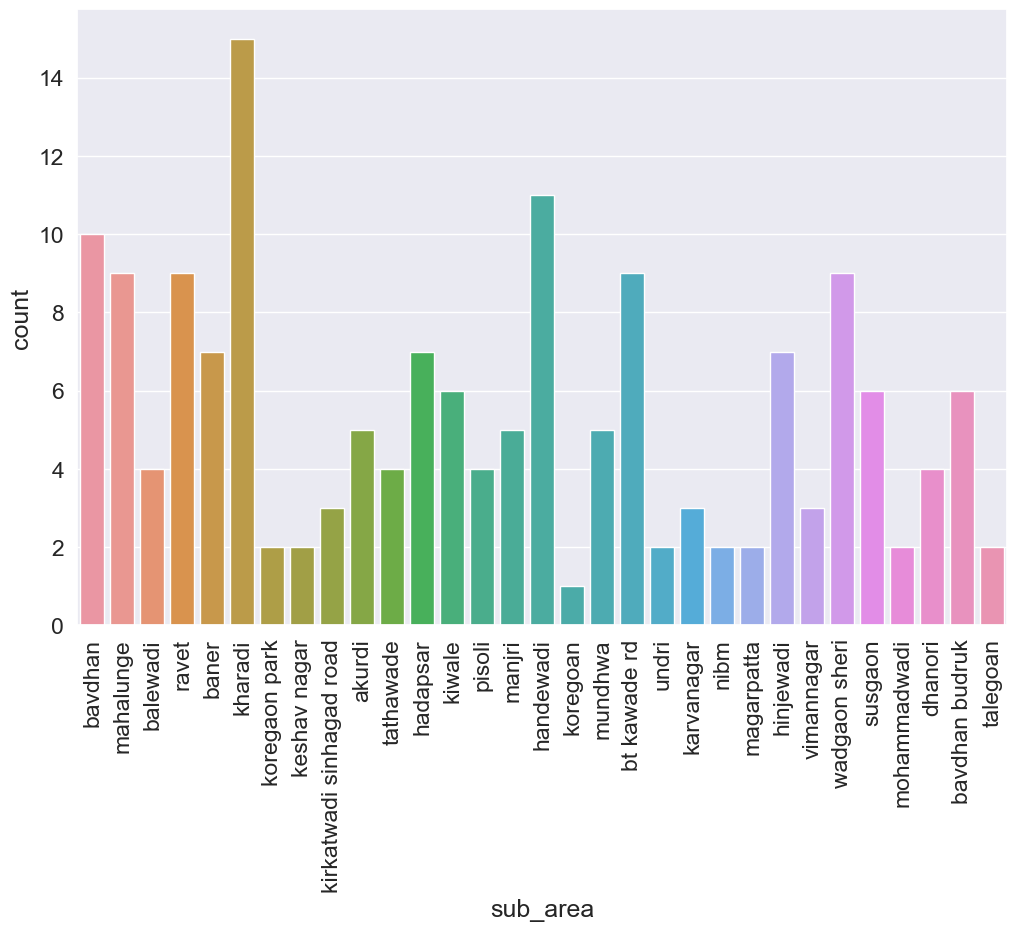

In [35]:
# Distribution of sub-areas contribution 
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df, x="sub_area", ax=ax)
plt.xticks(rotation=90)
plt.show()


In [41]:
sub_areas_contributions = sub_areas_contributions.rename(columns={'index':'sub_area', 'sub_area':'count'})
sub_areas_contributions

,sub_area,count
0,kharadi,15
1,handewadi,11
2,bavdhan,10
3,ravet,9
4,wadgaon sheri,9
5,bt kawade rd,9
6,mahalunge,9
7,hinjewadi,7
8,baner,7
9,hadapsar,7


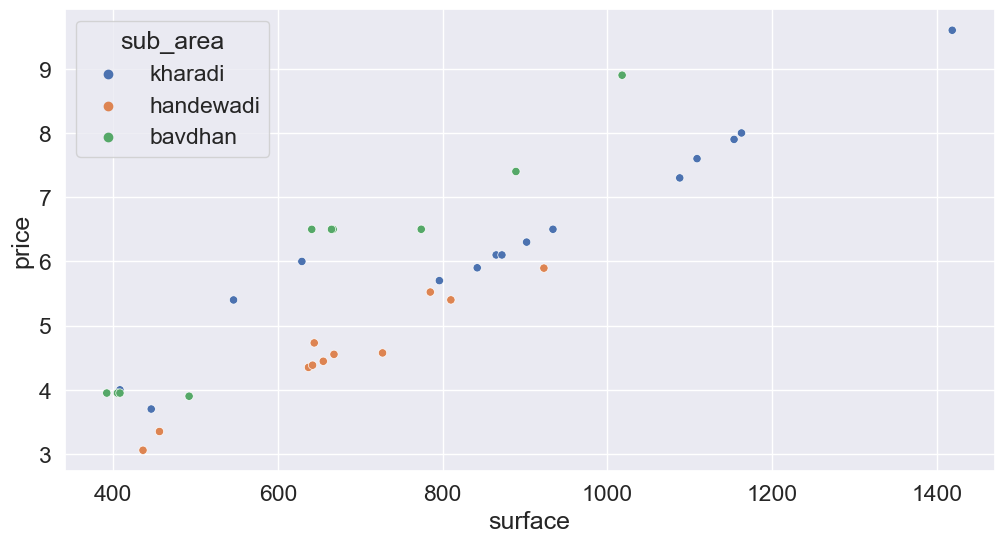

In [43]:
# Price vs surface for the first three most contribuions
fig, ax = plt.subplots(figsize=(12, 6))
df_plot = sub_areas_contributions.merge( df[["sub_area", "surface", "price"]], on="sub_area")
df_plot = df_plot[df_plot["count"]>9]

sns.scatterplot(data=df_plot, x="surface", y="price", hue="sub_area")
plt.show()



In [45]:
# Feature engineering
sa_sel_col = sub_areas_contributions.loc[sub_areas_contributions["count"]>6, "sub_area"].to_list()
df["sub_area"] = df["sub_area"].where(df["sub_area"].isin(sa_sel_col), "other")

In [46]:
df["sub_area"].unique(), len(df["sub_area"].unique())

(array(['bavdhan', 'mahalunge', 'other', 'ravet', 'baner', 'kharadi',
        'hadapsar', 'handewadi', 'bt kawade rd', 'hinjewadi',
        'wadgaon sheri'], dtype=object),
 11)

#### Converting Sub-Area to dummy variables

In [47]:
# Dummy variable conversion
ohe = OneHotEncoder(sparse_output=False)
X_dummy = ohe.fit_transform( df[["sub_area"]] )
X_dummy.shape, X_dummy, X_dummy.dtype

((166, 11),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 dtype('float64'))

In [48]:
# Type conversion
X_dummy = X_dummy.astype("int64")


In [51]:
# Adding the dummy columns to the dataset
sa_cols_name = ["sa"+str(i+1) for i in range(X_dummy.shape[1])]
df.loc[:,sa_cols_name] = X_dummy
df.head()

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,...,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11
0,bavdhan,1.0,492.0,3.9,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,bavdhan,2.0,774.0,6.5,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,bavdhan,3.0,889.0,7.4,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,bavdhan,3.0,1018.0,8.9,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
4,mahalunge,2.0,743.0,7.4,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [52]:
# Sub_area and dummy columns relationship 
df[["sub_area"]+sa_cols_name].drop_duplicates()\
            .sort_values("sub_area").reset_index(drop=True)

,sub_area,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11
0,baner,1,0,0,0,0,0,0,0,0,0,0
1,bavdhan,0,1,0,0,0,0,0,0,0,0,0
2,bt kawade rd,0,0,1,0,0,0,0,0,0,0,0
3,hadapsar,0,0,0,1,0,0,0,0,0,0,0
4,handewadi,0,0,0,0,1,0,0,0,0,0,0
5,hinjewadi,0,0,0,0,0,1,0,0,0,0,0
6,kharadi,0,0,0,0,0,0,1,0,0,0,0
7,mahalunge,0,0,0,0,0,0,0,1,0,0,0
8,other,0,0,0,0,0,0,0,0,1,0,0
9,ravet,0,0,0,0,0,0,0,0,0,1,0


## Univariate and bivariate analyses

In [53]:
# check only object datatype columns
data = df.select_dtypes(exclude="object")

In [54]:
data.head()

,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,...,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11
0,1.0,492.0,3.9,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,2.0,774.0,6.5,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,3.0,889.0,7.4,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,3.0,1018.0,8.9,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
4,2.0,743.0,7.4,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [55]:
data.describe()

,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,...,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,2.156627,778.412651,6.829157,0.734940,0.036145,0.036145,0.036145,0.975904,0.590361,0.795181,...,0.060241,0.054217,0.042169,0.066265,0.042169,0.090361,0.054217,0.439759,0.054217,0.054217
std,0.617560,210.659592,2.575547,0.442701,0.187215,0.187215,0.187215,0.153812,0.493255,0.404791,...,0.238653,0.227130,0.201582,0.249497,0.201582,0.287566,0.227130,0.497860,0.227130,0.227130
min,1.000000,280.000000,1.319000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,665.000000,4.800000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,752.000000,6.500000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,904.750000,8.300000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,1419.000000,13.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Continous variables

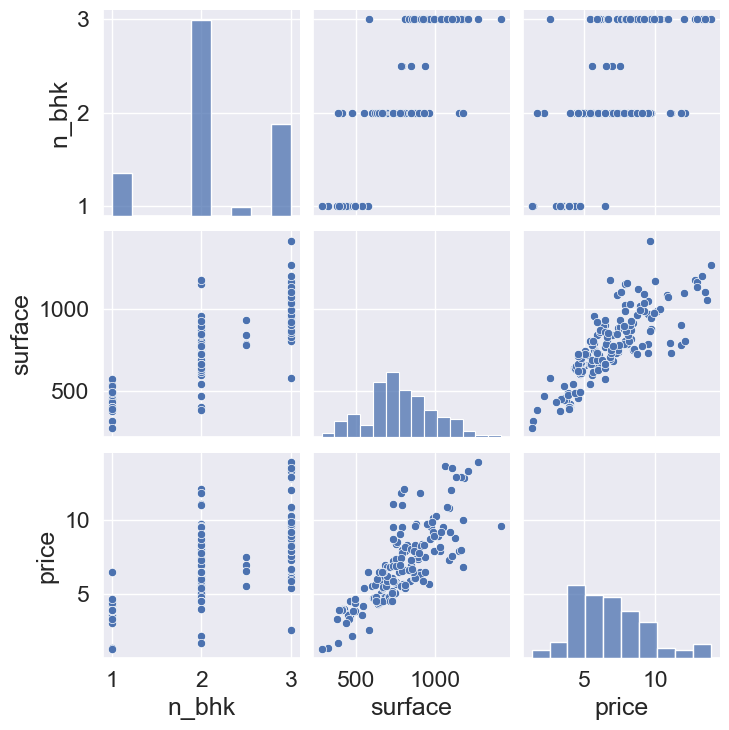

In [56]:
float_cols = data.select_dtypes( include="float" ).columns.to_list()
sns.pairplot( data[float_cols] )
plt.show()

#### Binary variables

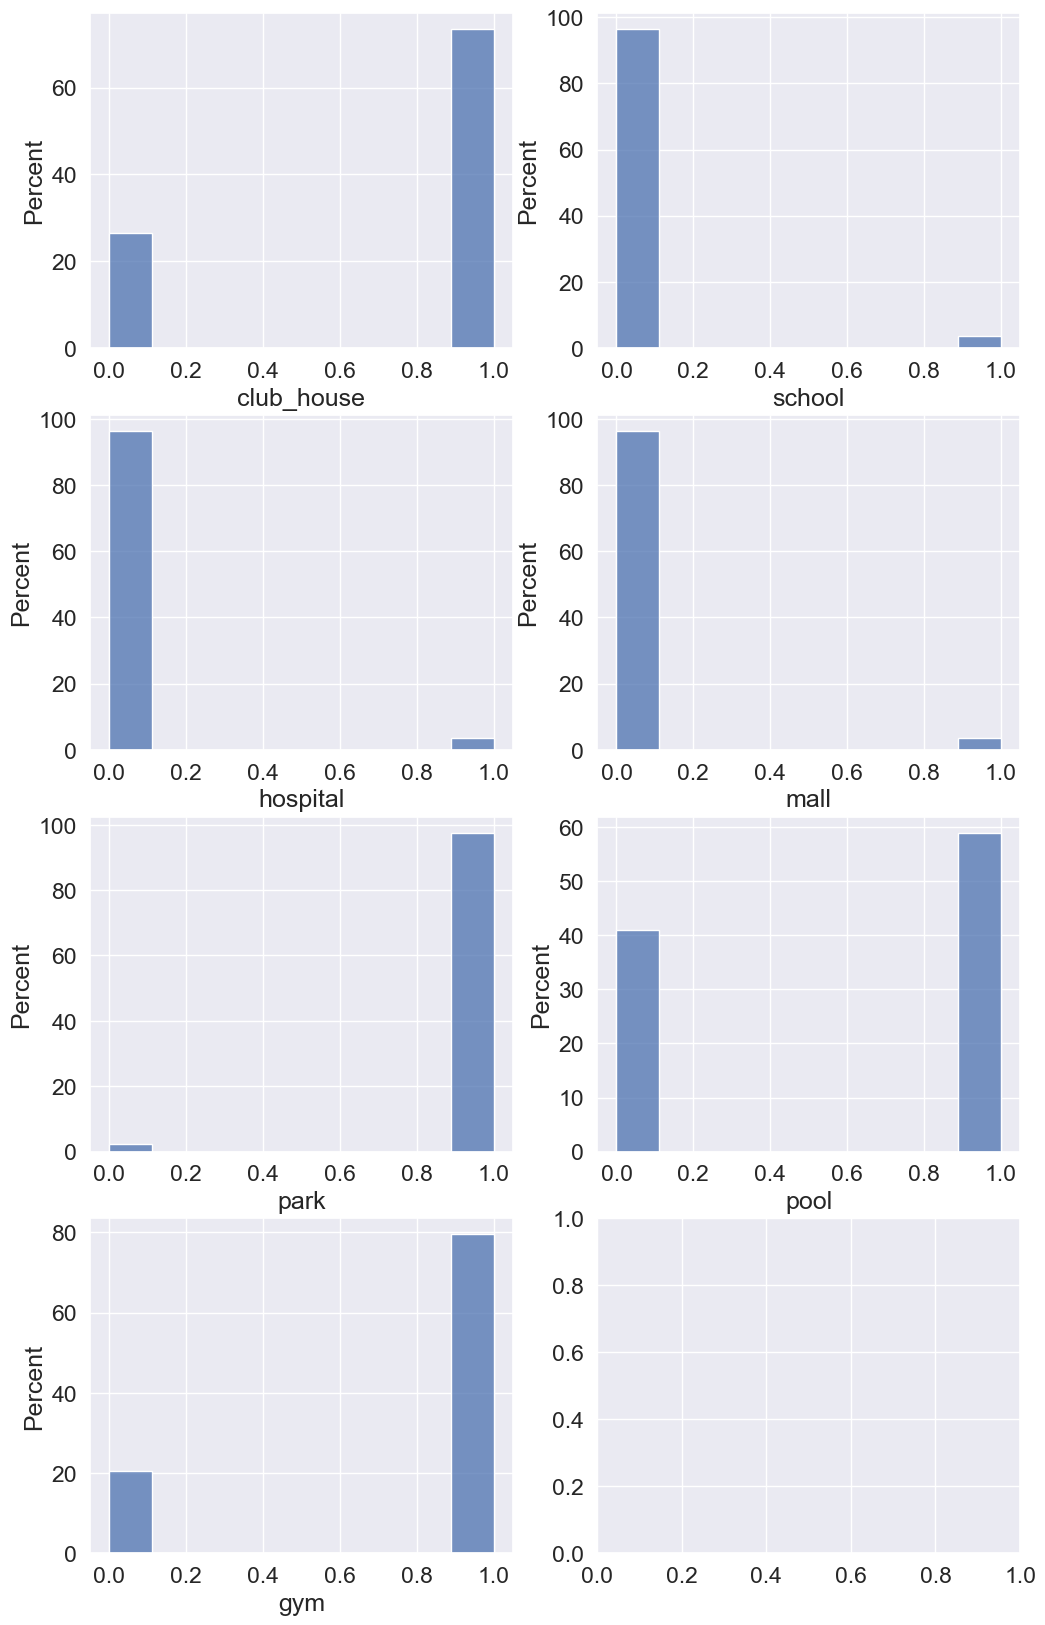

In [57]:
fig, ax = plt.subplots(4,2, figsize=(12,20))
for i, col in enumerate(binary_cols):
    sns.histplot(data, x=col, ax=ax[int(i/2), i%2], stat="percent")

#### Correlation map

In [59]:
corr_cols_list = float_cols+binary_cols
correl = data[corr_cols_list].corr()
correl

,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym
n_bhk,1.000000,0.822978,0.636715,0.019764,0.055578,0.055578,0.055578,-0.023830,0.142268,-0.016357
surface,0.822978,1.000000,0.804468,0.083486,0.033888,0.033888,0.033888,0.012092,0.174953,0.095560
price,0.636715,0.804468,1.000000,0.038626,0.032995,0.032995,0.032995,0.079808,0.264210,0.148547
club_house,0.019764,0.083486,0.038626,1.000000,0.116295,0.116295,0.116295,0.261653,0.360140,0.303974
school,0.055578,0.033888,0.032995,0.116295,1.000000,1.000000,1.000000,0.030429,0.161308,0.098281
hospital,0.055578,0.033888,0.032995,0.116295,1.000000,1.000000,1.000000,0.030429,0.161308,0.098281
mall,0.055578,0.033888,0.032995,0.116295,1.000000,1.000000,1.000000,0.030429,0.161308,0.098281
park,-0.023830,0.012092,0.079808,0.261653,0.030429,0.030429,0.030429,1.000000,0.188639,-0.079749
pool,0.142268,0.174953,0.264210,0.360140,0.161308,0.161308,0.161308,0.188639,1.000000,0.366441
gym,-0.016357,0.095560,0.148547,0.303974,0.098281,0.098281,0.098281,-0.079749,0.366441,1.000000


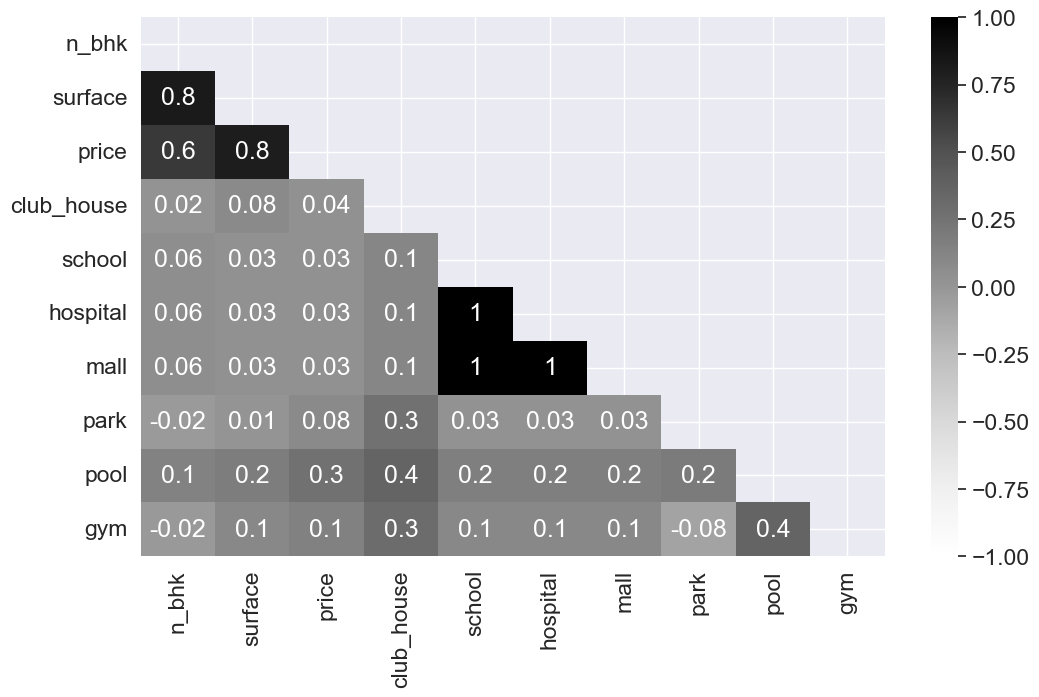

In [60]:
mask = np.zeros_like(correl )

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots( figsize=(12,7) )
sns.heatmap(correl, mask=mask, vmin=-1, cmap='Greys', 
            annot=True, fmt='.1g')
plt.show()

## Feature selection

In [62]:
# Price correlation with all other columns
corr_cols_list.remove("price")
corr_cols_list.extend(sa_cols_name)
corr_list = [] # to keep the correlations with price
for col in corr_cols_list:
    corr_list.append( round(data["price"].corr(data[col]),2) )    

corr_list

[0.64,
 0.8,
 0.04,
 0.03,
 0.03,
 0.03,
 0.08,
 0.26,
 0.15,
 0.25,
 -0.1,
 0.32,
 -0.0,
 -0.23,
 -0.01,
 -0.05,
 0.05,
 -0.03,
 -0.09,
 0.01]

In [63]:
# Sorted correlations
df_corr = pd.DataFrame( data=zip(corr_cols_list, corr_list), 
                 columns=["col_name", "corr"] )\
            .sort_values("corr", ascending=False)\
            .reset_index(drop=True)
df_corr

,col_name,corr
0,surface,0.80
1,n_bhk,0.64
2,sa3,0.32
3,pool,0.26
4,sa1,0.25
5,gym,0.15
6,park,0.08
7,sa8,0.05
8,club_house,0.04
9,school,0.03


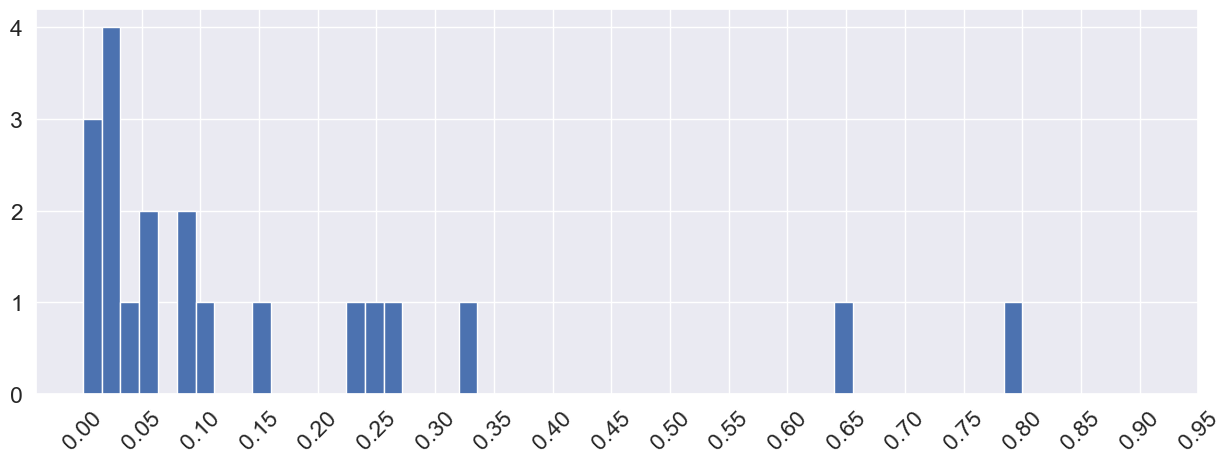

In [64]:
# Distribution of correlations with price 
fig, ax = plt.subplots(figsize=(15,5))
abs(df_corr["corr"]).hist(bins=50)
ax.set_xticks(np.arange(0, 1, 0.05))
plt.xticks(rotation=45)
plt.show()

In [65]:
features = df_corr.loc[abs(df_corr["corr"])>.1, "col_name"].to_list() 
features, len(features)

(['surface', 'n_bhk', 'sa3', 'pool', 'sa1', 'gym', 'sa5'], 7)

In [66]:
# Keeping the sub areas' name, their mean price and frequency (count)
sa_feature_list = [sa for sa in features if "sa" in sa]
lst = []
for col in sa_feature_list:
    sa_triger = df[col]==1
    sa = df.loc[sa_triger, "sub_area"].to_list()[0]
    x = df.loc[sa_triger, "price"]
    lst.append( (sa, np.mean(x), df[col].sum()) )

lst 


[('bt kawade rd', 10.227666666666666, 9),
 ('baner', 9.852571428571428, 7),
 ('handewadi', 4.568818181818182, 11)]

In [67]:
# sub area mean price comparision 
sa_f = pd.DataFrame(lst, columns=["sub_area","mean_price", "count"])
sa_f["total_mean_price"] = np.mean(df["price"])
sa_f

,sub_area,mean_price,count,total_mean_price
0,bt kawade rd,10.227667,9,6.829157
1,baner,9.852571,7,6.829157
2,handewadi,4.568818,11,6.829157


## Data scalling

In [68]:
# Selection the final dataset
sel_data = data[features+["price"]].copy()
sel_data.head()

,surface,n_bhk,sa3,pool,sa1,gym,sa5,price
0,492.0,1.0,0,1,0,1,0,3.9
1,774.0,2.0,0,1,0,1,0,6.5
2,889.0,3.0,0,1,0,1,0,7.4
3,1018.0,3.0,0,1,0,1,0,8.9
4,743.0,2.0,0,1,0,1,0,7.4


In [69]:
# Standard scaling for surface
standard_scaler = StandardScaler()
sel_data["surface"] = standard_scaler.fit_transform(sel_data[["surface"]])


In [70]:
# Showing the final datset
sel_data

,surface,n_bhk,sa3,pool,sa1,gym,sa5,price
0,-1.363713,1.0,0,1,0,1,0,3.900
1,-0.021010,2.0,0,1,0,1,0,6.500
2,0.526546,3.0,0,1,0,1,0,7.400
3,1.140761,3.0,0,1,0,1,0,8.900
4,-0.168612,2.0,0,1,0,1,0,7.400
...,...,...,...,...,...,...,...,...
161,-0.230510,2.0,0,1,1,1,0,8.700
162,1.697840,3.0,0,1,1,1,0,12.900
163,0.050410,2.0,0,1,1,1,0,9.500
164,1.564522,3.0,0,1,1,1,0,13.500


## Saving the data

In [71]:
# save the new data
sel_data.to_csv("../myInput/features.csv", index=False)